## Endurance racing is a fascinating motorsport discipline that tests both the performance of vehicles and the physical endurance of drivers. It is typically characterized by long-duration events, which can last anywhere from several hours to multiple days. The aim is to complete as many laps as possible or cover the most distance in the given time. There are several key factors and components that shape endurance racing:

#### Breaking down the analysis into parts using different tools will allow you to leverage the strengths of each platform. Here's a breakdown of how I have structured the work across Python,Tableau\Power BI, and how they can work together:

##### Data Set sourced from Kaggle : https://www.kaggle.com/datasets/heidarmirhajisadati/german-vehicle-price-and-efficiency-dataset

######  IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

##### Read data from csv file and view data

In [2]:
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1EFRw1Ge97QUxBLuW1-L60eVu1dN7DG5b")
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg


##### Shape of the data and number of records

In [3]:
print(df.shape)

(500, 10)


##### Check for null values

In [4]:
df.isnull()

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False


##### Total null records

In [5]:
df.isnull().sum()

Brand                         0
Model                         0
Year                          0
Mileage                       0
Fuel Type                     0
Fuel Consumption (L/100km)    0
Horsepower (HP)               0
Transmission                  0
Price                         0
City                          0
dtype: int64

##### Data types of the records

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       500 non-null    object 
 1   Model                       500 non-null    object 
 2   Year                        500 non-null    int64  
 3   Mileage                     500 non-null    int64  
 4   Fuel Type                   500 non-null    object 
 5   Fuel Consumption (L/100km)  500 non-null    float64
 6   Horsepower (HP)             500 non-null    int64  
 7   Transmission                500 non-null    object 
 8   Price                       500 non-null    float64
 9   City                        500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


##### Column names printed

In [7]:
print(df.columns)

Index(['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type',
       'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission',
       'Price ', 'City'],
      dtype='object')


#### As there seems to be a trailing space in column name "Price" , the same has been removed.

In [8]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Brand', 'Model', 'Year', 'Mileage', 'Fuel Type',
       'Fuel Consumption (L/100km)', 'Horsepower (HP)', 'Transmission',
       'Price', 'City'],
      dtype='object')


##### Check for Duplicates and there is no duplicates below

In [9]:
df[df[['Brand','Model','Year','Mileage','Fuel Type','Fuel Consumption (L/100km)','Horsepower (HP)','Transmission','Price','City']].duplicated() == True]

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City


### BASIC STATS

In [10]:
df.describe()

,Year,Mileage,Fuel Consumption (L/100km),Horsepower (HP),Price
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2014.302000,158885.270000,7.630800,281.112000,51064.288940
std,5.504125,85604.122684,2.654805,121.169251,28652.646997
min,2005.000000,5667.000000,3.000000,70.000000,5209.730000
25%,2009.750000,85787.250000,5.300000,175.000000,24478.057500
50%,2014.000000,160433.500000,7.900000,279.500000,52892.525000
75%,2019.000000,234079.750000,10.000000,385.000000,75037.670000
max,2023.000000,299573.000000,12.000000,500.000000,99981.480000


#### Feature engineering helps to better understand the relationships in data. It helps in generating hypotheses that can guide analysis. Similarly, engineering categorical variables into numerical representations can make them easier to visualize and interpret

### CREATING NEW FEATURES

#### Age of the Car

#### Mileage per Year

#### Mileage per Month

#### Fuel Efficiency Ratio

#### Price per Horsepower

#### Log Transformations

In [11]:
#Age of the Car: Car Age = Current Year - Year
df["Car Age"]= datetime.datetime.now().year-df["Year"] 
#Mileage per Year: Mileage / Car Age (if the car age is non-zero)
df["Per Year Mileage"]=df["Mileage"]/df["Car Age"]
#Mileage per Month: Mileage / Car Age (if the car age is non-zero)
df["Per Month Mileage"]=df["Per Year Mileage"]/12
#Fuel Efficiency Ratio: HP / Fuel Consumption (higher values indicate better performance)
df["Fuel Efficiency"]=df["Horsepower (HP)"]/df["Fuel Consumption (L/100km)"]
#Price per Horsepower
df["Price per Horsepower"]=df["Price"]/df["Horsepower (HP)"]
#Log Transformations: To reduce skewness in Price
df['Log_Price'] = np.log(df['Price'])
df

,Brand,Model,Year,Mileage,Fuel Type,Fuel Consumption (L/100km),Horsepower (HP),Transmission,Price,City,Car Age,Per Year Mileage,Per Month Mileage,Fuel Efficiency,Price per Horsepower,Log_Price
0,Audi,Q7,2006,260886,Diesel,9.5,213,Automatic,12063.27,Cologne,19,13730.842105,1144.236842,22.421053,56.635070,9.397921
1,Opel,Corsa,2015,72505,Hybrid,6.5,335,Automatic,33890.58,Berlin,10,7250.500000,604.208333,51.538462,101.165910,10.430892
2,Mercedes,C-Class,2007,125356,Electric,9.9,445,Automatic,92639.12,Berlin,18,6964.222222,580.351852,44.949495,208.177798,11.436467
3,Volkswagen,Polo,2009,130867,Electric,4.1,165,Automatic,88003.50,Munich,16,8179.187500,681.598958,40.243902,533.354545,11.385132
4,Opel,Astra,2022,57482,Electric,5.2,145,Manual,26028.97,Hamburg,3,19160.666667,1596.722222,27.884615,179.510138,10.166965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Volkswagen,Tiguan,2022,116092,Hybrid,8.0,76,Manual,88718.55,Munich,3,38697.333333,3224.777778,9.500000,1167.349342,11.393224
496,Mercedes,GLA,2018,107863,Electric,9.8,284,Automatic,28997.99,Frankfurt,7,15409.000000,1284.083333,28.979592,102.105599,10.274982
497,Audi,Q7,2022,236821,Electric,9.5,98,Manual,37530.18,Cologne,3,78940.333333,6578.361111,10.315789,382.961020,10.532901
498,Porsche,Macan,2014,81406,Petrol,11.3,330,Manual,37858.01,Frankfurt,11,7400.545455,616.712121,29.203540,114.721242,10.541598


# EDA

#### frequency distribution of different brands

In [12]:
Brand_distribution=df["Brand"].value_counts().reset_index()
Brand_distribution.columns = ['Brand', 'Frequency']
Brand_distribution

,Brand,Frequency
0,Volkswagen,97
1,Mercedes,90
2,Opel,85
3,BMW,85
4,Porsche,79
5,Audi,64


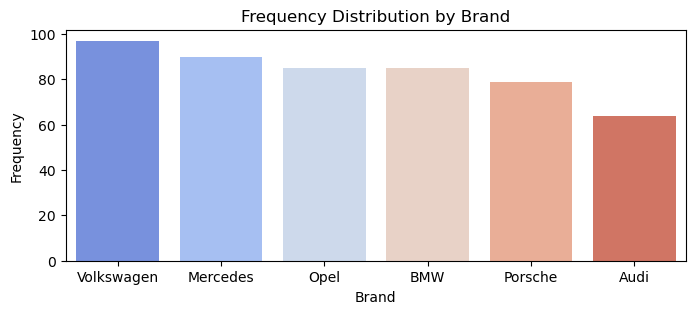

In [13]:
# Set the figure size
plt.figure(figsize=(8, 3))

# Use seaborn for better styling
sns.barplot(x='Brand', y='Frequency', data=Brand_distribution,hue='Brand', palette='coolwarm')

# Labels and Title
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Frequency Distribution by Brand')
plt.show()

#### Number of unique models exist for each brand and their frequency

In [14]:
Brand_model_counts =df.groupby(['Brand','Model']).size().reset_index(name='Frequency')
sorted_Brand_model_counts=Brand_model_counts.sort_values(by='Frequency',ascending=False)
sorted_Brand_model_counts["Brand_Model"]=sorted_Brand_model_counts['Brand']+' '+sorted_Brand_model_counts['Model']
sorted_Brand_model_counts = sorted_Brand_model_counts.drop(columns=["Brand", "Model"])
sorted_Brand_model_counts

,Frequency,Brand_Model
21,33,Volkswagen Tiguan
15,32,Porsche Cayenne
12,30,Opel Astra
8,29,Mercedes C-Class
4,28,BMW 3 Series
13,28,Opel Corsa
14,27,Opel Insignia
20,26,Volkswagen Polo
17,24,Porsche Panamera
16,23,Porsche Macan


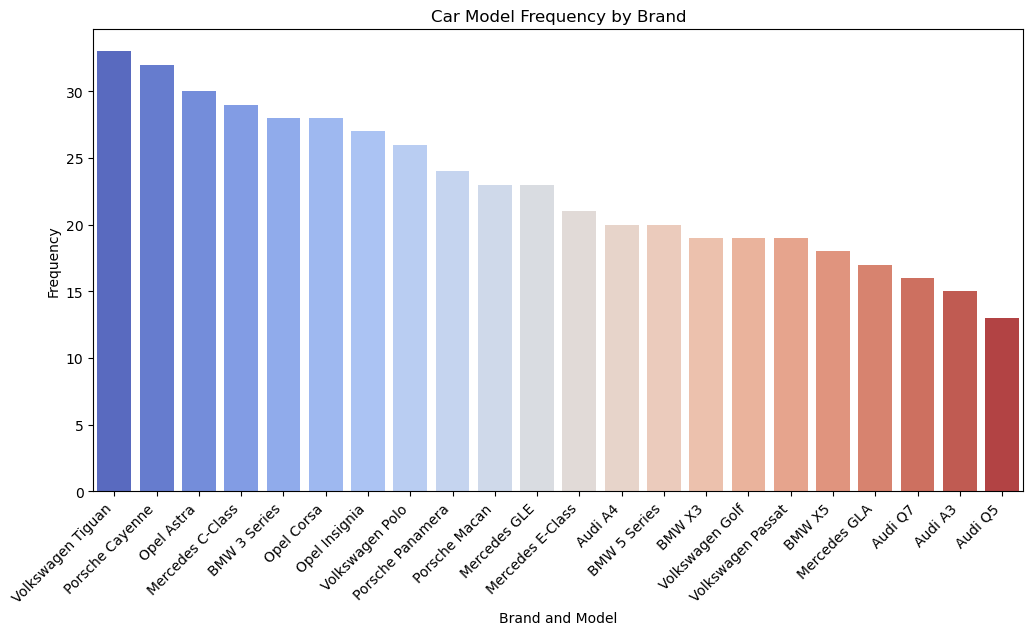

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Use seaborn for better styling
sns.barplot(x='Brand_Model', y='Frequency', data=sorted_Brand_model_counts,hue='Brand_Model', palette='coolwarm')

# Rotate X-axis labels
plt.xticks(rotation=45, ha='right')

# Labels and Title
plt.xlabel('Brand and Model')
plt.ylabel('Frequency')
plt.title('Car Model Frequency by Brand')

plt.show()

#### trends in fuel preference

In [16]:
Fuel_Type_Counts=df["Fuel Type"].value_counts().reset_index()
Fuel_Type_Counts.columns = ['Fuel Type', 'Frequency']
Fuel_Type_Counts

,Fuel Type,Frequency
0,Petrol,135
1,Electric,129
2,Hybrid,123
3,Diesel,113


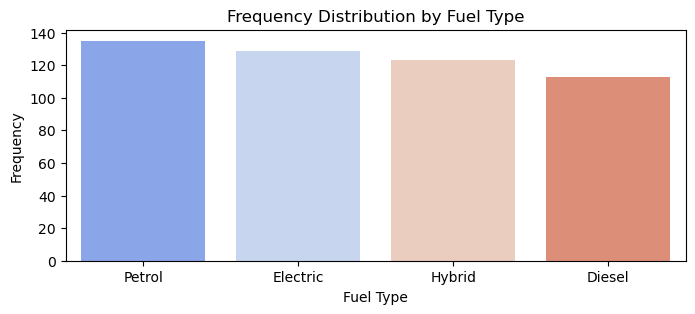

In [17]:
# Set the figure size
plt.figure(figsize=(8, 3))

# Use seaborn for better styling
sns.barplot(x='Fuel Type', y='Frequency', data=Fuel_Type_Counts,hue='Fuel Type', palette='coolwarm')

# Labels and Title
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution by Fuel Type')
plt.show()

#### fuel type distribution per year

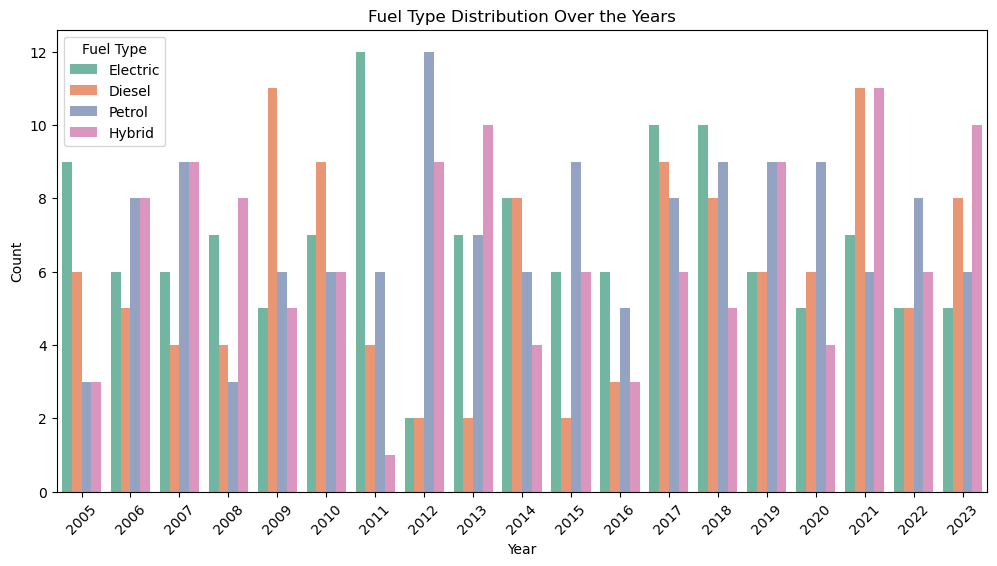

In [18]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values("Year")

sns.set_palette("Set2")

# Use countplot to count occurrences of each Fuel Type per Year
sns.countplot(x=df_sorted["Year"].astype(str), hue=df_sorted["Fuel Type"])

plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Fuel Type Distribution Over the Years")

plt.show()

## Fuel Efficiency & Cost Analysis

#### fuel efficiency across different fuel types

<Axes: xlabel='Fuel Type', ylabel='Fuel Efficiency'>

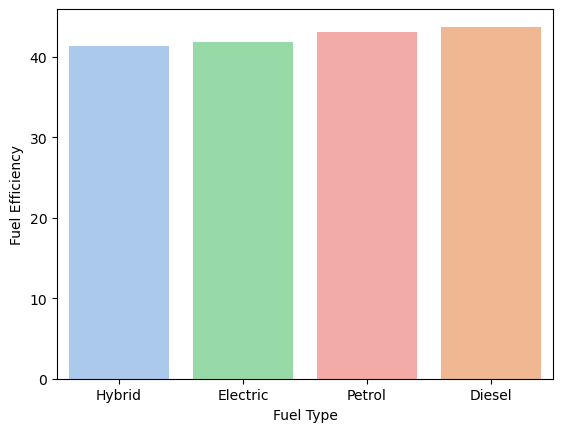

In [67]:
sns.set_palette("pastel")
df = df.sort_values(by="Fuel Efficiency", ascending=True)
sorted_fuel_types = df.groupby("Fuel Type")["Fuel Efficiency"].mean().sort_values().index
sns.barplot(x=df["Fuel Type"], y=df["Fuel Efficiency"], hue=df["Fuel Type"], errorbar=None,order=sorted_fuel_types)

## Pricing & Market Trends Analysis

#### price differences based on fuel type

<Axes: xlabel='Fuel Type', ylabel='Price'>

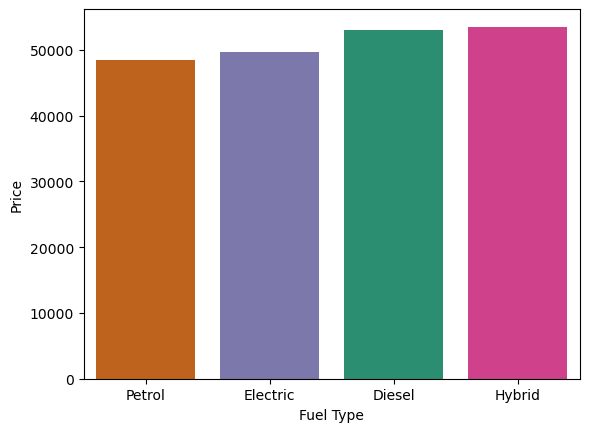

In [65]:
sns.set_palette("Dark2")
df = df.sort_values(by="Price", ascending=True)
sorted_fuel_types = df.groupby("Fuel Type")["Price"].mean().sort_values().index
sns.barplot(x=df["Fuel Type"], y=df["Price"], hue=df["Fuel Type"], errorbar=None,order=sorted_fuel_types)

#### Price vs. Horsepower

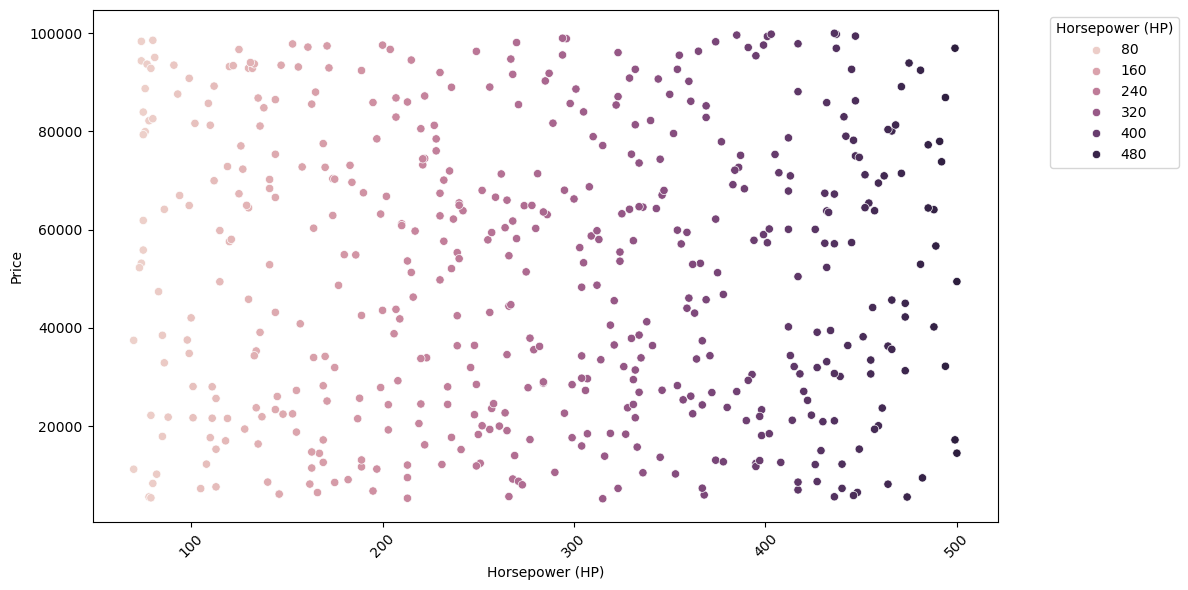

In [44]:
#df["HP Bins"] = pd.cut(df["Horsepower (HP)"], bins=10)
plt.figure(figsize=(12, 6))
sns.set_palette("Paired")
sns.scatterplot(x=df["Horsepower (HP)"], y=df["Price"], hue=df["Horsepower (HP)"])
plt.xticks(rotation=45) 


plt.legend(title='Horsepower (HP)', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Show the plot
plt.tight_layout()
plt.show()

### Price vs. Year

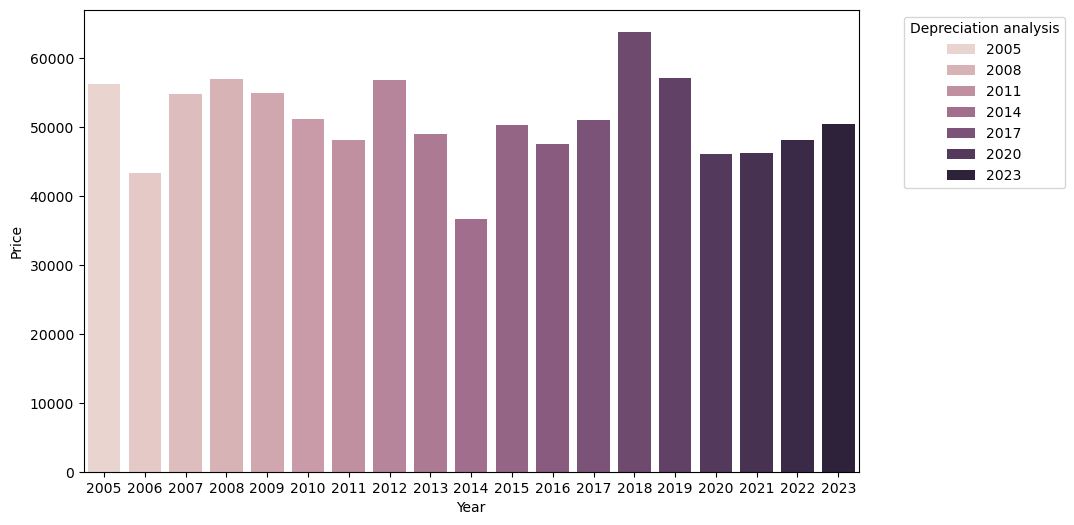

In [37]:
plt.figure(figsize=(10, 6))
sns.set_palette("Dark2")
sns.barplot(x=df["Year"], y=df["Price"], hue=df["Year"], errorbar=None)
plt.legend(title='Depreciation analysis', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

### Price vs. Mileage

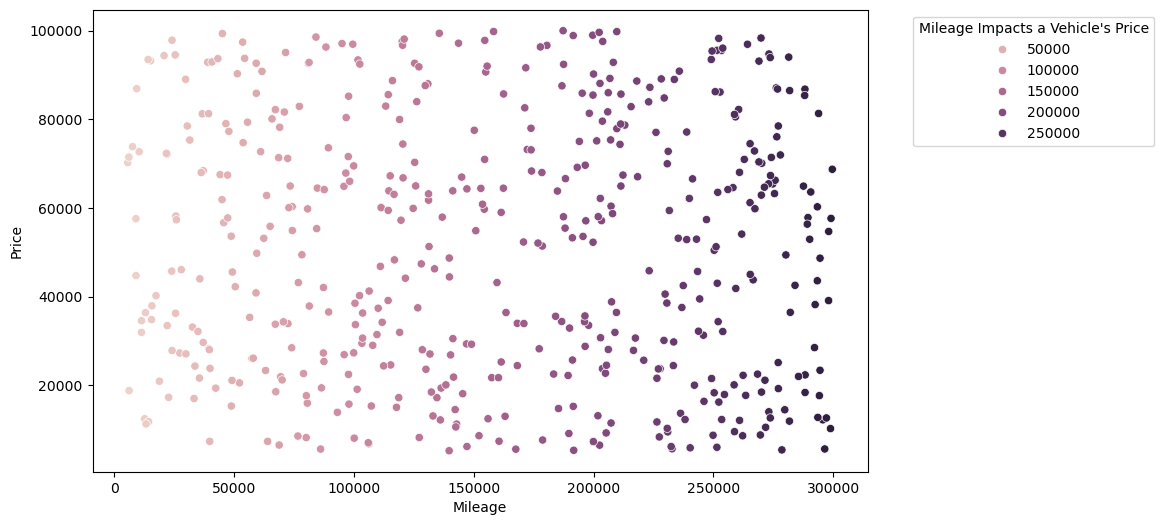

In [42]:
plt.figure(figsize=(10, 6))
sns.set_palette("YlGnBu")
sns.scatterplot(x=df["Mileage"], y=df["Price"], hue=df["Mileage"])
plt.legend(title="Mileage Impacts a Vehicle's Price", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

### Price vs. Brand

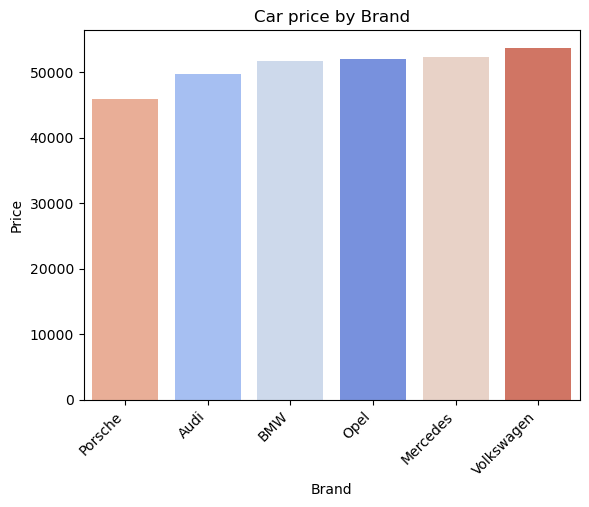

In [80]:
# Use seaborn for better styling

df = df.sort_values(by="Price", ascending=True)
sorted_brand_types = df.groupby("Brand")["Price"].mean().sort_values().index
sns.barplot(x="Brand", y="Price", data=df, hue="Brand", palette='coolwarm', order=sorted_brand_types, errorbar=None)

# Rotate X-axis labels
plt.xticks(rotation=45, ha='right')

# Labels and Title
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Car price by Brand')

plt.show()



### Price vs. Brand and Model

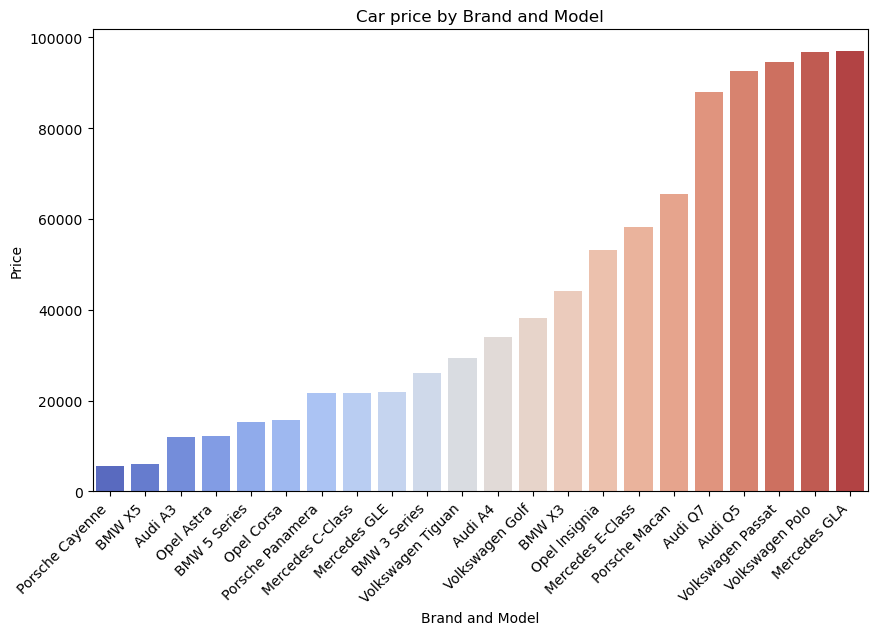

In [60]:
# Use seaborn for better styling
plt.figure(figsize=(10, 6))
sorted_Brand_model_counts["Price"] = df["Price"]
sorted_Brand_model_counts = sorted_Brand_model_counts.sort_values(by="Price", ascending=True)
sns.barplot(x='Brand_Model', y='Price', data=sorted_Brand_model_counts,hue='Brand_Model', palette='coolwarm',errorbar=None)

# Rotate X-axis labels
plt.xticks(rotation=45, ha='right')

# Labels and Title
plt.xlabel('Brand and Model')
plt.ylabel('Price')
plt.title('Car price by Brand and Model')

plt.show()


### The data analysis covers a comprehensive breakdown of car pricing trends, fuel efficiency, and market trends, utilizing various statistical and visualization techniques. Key insights include:
### Price Influences:

### Price is significantly impacted by brand, model, mileage, year, and horsepower.
#### Fuel type also plays a role in pricing variations.

### Market & Trend Analysis:

#### Fuel efficiency trends reveal shifts in consumer preferences over the years.
#### The distribution of fuel types and brands provides insights into market demand.

### Feature Engineering & Transformations:

#### Creating new features like car age, mileage per year/month, fuel efficiency ratio, and price per horsepower improves data interpretation.
#### Log transformations help in handling skewed data distributions.

### Data Cleaning & Quality Checks:

### Duplicates were checked, and column inconsistencies were corrected.
#### Null values and data types were analyzed to ensure consistency.